In [6]:
import sklearn.svm as svm
import numpy as np 
import random

In [7]:
train_x = []
train_y = []
with open('train.txt') as f:
    for d in f.readlines():
        d_pre = np.fromstring(d, dtype=float, sep=' ')
        train_x.append(d_pre[1:])
        train_y.append(int(d_pre[0]))
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = []
test_y = []
with open('test.txt') as f:
    for d in f.readlines():
        d_pre = np.fromstring(d, dtype=float, sep=' ')
        test_x.append(d_pre[1:])
        test_y.append(int(d_pre[0]))
test_x = np.array(test_x)
test_y = np.array(test_y)

In [9]:
def adjust(train_y,test_y,target):
    return (train_y == target).astype(int),  (test_y == target).astype(int)

In [10]:
train_x.shape

(7291, 2)

In [115]:
def Q13(train_x,train_y):
    train_y_2, test_y_2 = adjust(train_y,test_y,2)
    w_list = []

    for c in [10**i for i in [-5,-3,-1,1,3]]:
        clf = svm.SVC(kernel = 'linear',shrinking=False,C=c,max_iter=100000)
        clf.fit(train_x,train_y_2)
        w = clf.coef_[0]
        w_list.append(np.linalg.norm(w))
        
    plt.xlabel('LogC')
    plt.ylabel('two norm of w')
    plt.plot([-5,-3,-1,1,3],w_list)
    plt.savefig('Q13.png')

In [116]:
Q13(train_x,train_y)

/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [117]:
def Q14(train_x,train_y):
    train_y_4, test_y_4 = adjust(train_y,test_y,4)
    Eins = []

    for c in [10**i for i in [-5,-3,-1,1,3]]:
        clf = svm.SVC(kernel = 'poly',degree=2, gamma=1, coef0=1, tol=1e-4,shrinking=False,C=c,max_iter = 100000)
        clf.fit(train_x,train_y_4)
        error = np.sum(clf.predict(train_x) == train_y_4)
        Eins.append(error)
    plt.xlabel('LogC')
    plt.ylabel('Ein')
    plt.plot([-5,-3,-1,1,3],Eins)
    plt.savefig('Q14.png')

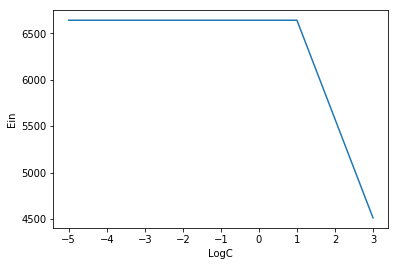

In [83]:
# plt.figure(figsize=(10,8))
plt.xlabel('LogC')
plt.ylabel('Ein')
plt.plot([-5,-3,-1,1,3],Eins)
plt.savefig('Q14.png')
plt.show()

In [102]:
def Q15(train_x,train_y):
    train_y_0, test_y_0 = adjust(train_y,test_y,0)
    d_of_sv = []

    for c in [10**i for i in [-2,-1,0,1,2]]:
        clf = svm.SVC(kernel = 'rbf', gamma=80, tol=1e-7,shrinking=False,C=c,max_iter = 100000)
        clf.fit(train_x,train_y_0)
        d_of_sv.append(abs(clf.decision_function(train_x[clf.support_]))/np.linalg.norm(clf.dual_coef_[0]))
        
    c = [-2,-1,0,1,2]
    for i,d in enumerate(d_of_sv):
        plt.title('log10 C is %d'%c[i])
        plt.xlabel('SV')
        plt.ylabel('Distance')
        plt.plot([i for i in range(d.shape[0])],d)
        plt.savefig('Q15_log10 c is %d.png'%c[i])

/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


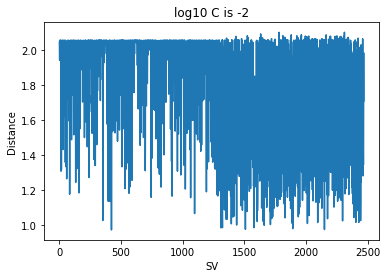

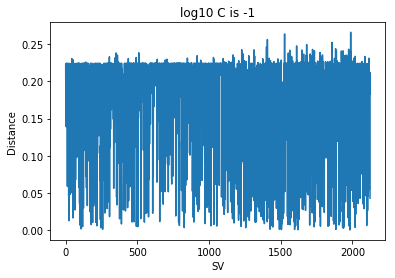

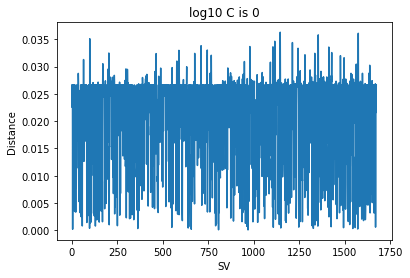

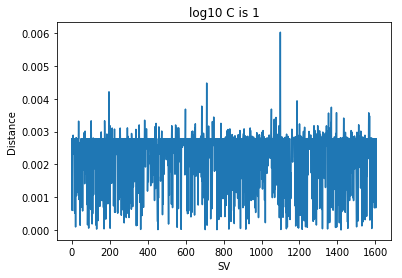

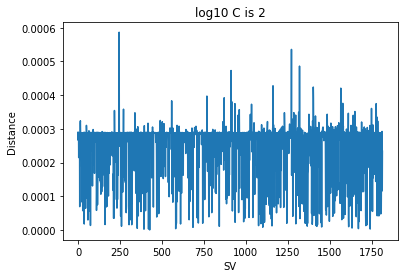

In [114]:
c = [-2,-1,0,1,2]
for i,d in enumerate(d_of_sv):
    plt.title('log10 C is %d'%c[i])
    plt.xlabel('SV')
    plt.ylabel('Distance')
    plt.plot([i for i in range(d.shape[0])],d)
    plt.savefig('Q15_log10 c is %d.png'%c[i])
    plt.show()

In [118]:
def Q16(train_x,train_y):
    train_y_0, test_y_0 = adjust(train_y,test_y,0)
    dic = {-2:0,-1:0,0:0,1:0,2:0}

    for t in range(100):
        min_err = 100000
        for r in [10**i for i in [-2,-1,0,1,2]]:
            val_index = np.random.choice([i for i in range(train_x.shape[0])],size=1000,replace=False)
            val_x = train_x[val_index,:]
            val_y = train_y_0[val_index]
            train_s_x = np.delete(train_x,val_index,0)
            train_s_y = np.delete(train_y_0,val_index)

            clf = svm.SVC(kernel = 'rbf', gamma=r, tol=1e-7,shrinking=False,C=0.1,max_iter = 100000)
            clf.fit(train_s_x,train_s_y)
            error = np.sum(clf.predict(val_x) == val_y)
            if(error < min_err):
                min_err = error
                opt_r = np.log10(r)
        dic[opt_r] += 1
        
    values = []
    for key, value in dic.items():
        values.append(value)
    plt.xlabel('Logr')
    plt.ylabel('The number of times selected')
    plt.plot([-2,-1,0,1,2],values)
    plt.savefig('Q16.png')

In [ ]:
Q16(train_x,train_y)

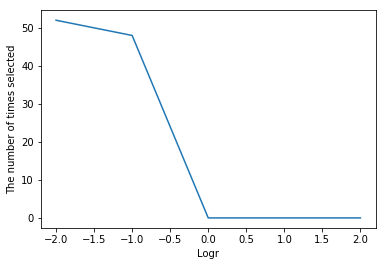

In [75]:
values = []
for key, value in dic.items():
    values.append(value)
plt.xlabel('Logr')
plt.ylabel('The number of times selected')
plt.plot([-2,-1,0,1,2],values)
plt.savefig('Q16.png')
plt.show()